In [1]:
import re
import bs4 #this may be appendices only
import requests #this may be appendices only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import datetime
import seaborn as sns
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans

In [2]:
full_df_04_14 = pd.read_csv('2021-04-14_Cleaned_full_df.csv')
full_df_04_14.columns

Index(['Unnamed: 0', 'index', 'lr_my', 'author', 'title', 'pub_date',
       'publisher', 'isbn', 'lr_top', 'lr_hof', 'debut', 'lr_yfav', 'genre',
       'annotation', 'nom_lib_lr', 'permalink', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'],
      dtype='object')

In [3]:
indicator_vars = ['lr_top','lr_hof','debut']
for indicator in indicator_vars:
    print(indicator, full_df_04_14[indicator].value_counts())
    full_df_04_14[indicator]=full_df_04_14[indicator].apply(lambda x: 1 if x == 'x' else 0) #convert to Booleans
    print(indicator,full_df_04_14[indicator].value_counts())


lr_top x    86
Name: lr_top, dtype: int64
lr_top 0    850
1     86
Name: lr_top, dtype: int64
lr_hof x    77
Name: lr_hof, dtype: int64
lr_hof 0    859
1     77
Name: lr_hof, dtype: int64
debut x    181
Name: debut, dtype: int64
debut 0    755
1    181
Name: debut, dtype: int64


In [4]:
full_df_04_14[indicator_vars]

,lr_top,lr_hof,debut
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
931,0,0,0
932,0,0,0
933,0,0,0
934,1,0,0


In [5]:
full_df_04_14.genre.value_counts()

Literary Fiction      210
Mystery               117
Suspense/Thriller      85
Historical Fiction     84
SF/Fantasy             82
Romance                49
Non-Fiction            32
Memoir                 11
Horror                  8
Biography               5
Short Stories           5
Graphic Novel           1
Suspense/Thiller        1
Literary Fic            1
Short stories           1
Literary Fiction        1
Name: genre, dtype: int64

In [6]:
full_df_04_14.genre.groupby(full_df_04_14.lr_my.str[:4]).value_counts()

lr_my  genre             
2013   Historical Fiction     8
       Literary Fiction       8
       Mystery                7
       Non-Fiction            5
       Romance                4
                             ..
2019   Historical Fiction    12
       Mystery               10
       Non-Fiction            2
       Graphic Novel          1
       Literary Fiction       1
Name: genre, Length: 71, dtype: int64

In [7]:
full_df_04_14.isbn.groupby(full_df_04_14.lr_my.str[:4]).count()

lr_my
2013     40
2014    110
2015    110
2016    120
2017    100
2018    115
2019    147
2020    155
2021     39
Name: isbn, dtype: int64

In [8]:
full_df_04_14.genre.groupby(full_df_04_14.lr_my.str[:4]).count()

lr_my
2013     40
2014    110
2015    110
2016    120
2017    100
2018    114
2019     99
2020      0
2021      0
Name: genre, dtype: int64

In [23]:
full_df_04_14.loc[full_df_04_14.genre=='Literary Fic']
full_df_04_14.loc[884,'genre'] = 'Literary Fiction'

In [30]:
full_df_04_14.genre = full_df_04_14.genre.str.strip()

In [32]:
full_df_04_14.genre.value_counts()

Literary Fiction      212
Mystery               117
Suspense/Thriller      85
Historical Fiction     84
SF/Fantasy             82
Romance                49
Non-Fiction            32
Memoir                 11
Horror                  8
Biography               5
Short Stories           5
Graphic Novel           1
Suspense/Thiller        1
Short stories           1
Name: genre, dtype: int64

In [41]:
full_df_04_14['genre']=full_df_04_14['genre'].astype(str)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

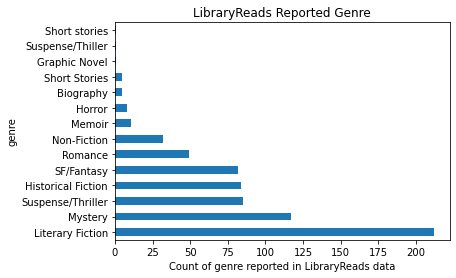

In [54]:
full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].value_counts().plot(kind = 'barh')
plt.xlabel('Count of genre reported in LibraryReads data')
plt.ylabel('genre')
plt.title('LibraryReads Reported Genre')
plt.tight_layout

Index(['Literary Fiction', 'Mystery', 'Suspense/Thriller',
       'Historical Fiction', 'SF/Fantasy', 'Romance', 'Non-Fiction', 'Memoir',
       'Horror', 'Biography', 'Short Stories', 'Graphic Novel',
       'Suspense/Thiller', 'Short stories'],
      dtype='object')


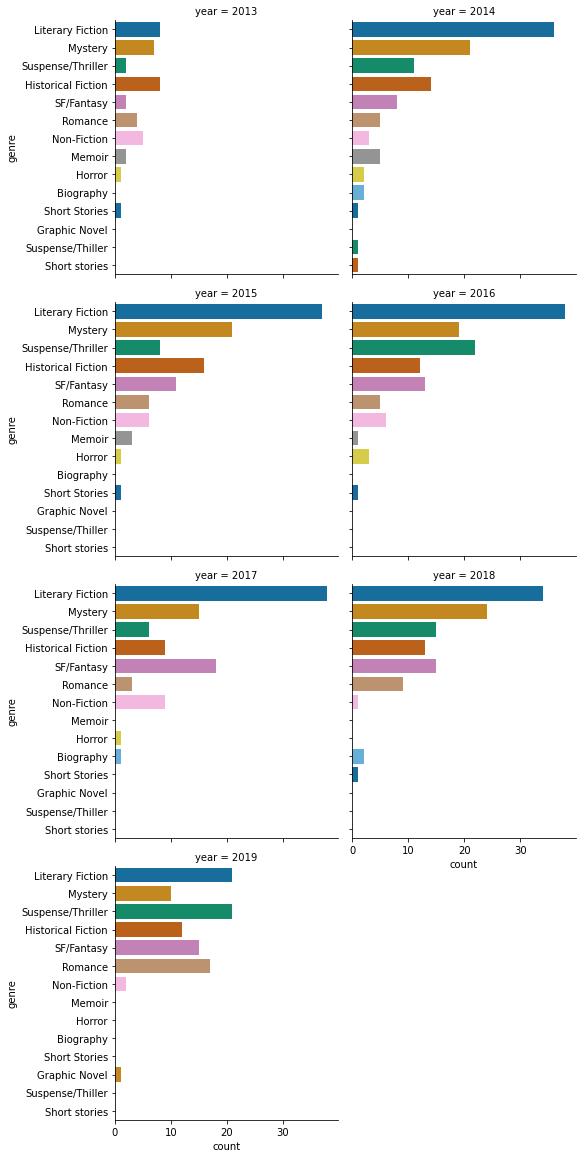

In [94]:
full_df_04_14['year'] = full_df_04_14.lr_my.str[:4].astype(int)


#sns.facetgrid(full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].groupby(
 #   full_df_04_14.lr_my.str[:4]).value_counts().plot(kind = 'barh')
ordered_genres = full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].value_counts().index
print(ordered_genres)
sns.catplot(y = 'genre', 
            data=full_df_04_14.loc[full_df_04_14.genre != 'nan'],
            kind='count',
            col = 'year', col_wrap = 2,
           height = 4, aspect = 1,
           order=ordered_genres,
           palette = 'colorblind')

In [130]:
full_df_04_14.to_csv('wide_df.csv')
long_df = pd.melt(full_df_04_14, id_vars=['isbn'], value_vars=['genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'])
len(long_df)
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning

LibofCongress_genres.index


51 genres identified in Library of Congress Records more than once
52 genres identified in Library of Congress Records once


Index(['Suspense fiction.', 'Mystery fiction.', 'Love stories.',
       'Domestic fiction.', 'Historical fiction.', 'Psychological fiction.',
       'Fiction.', 'Fantasy fiction.', 'Thrillers (Fiction)',
       'Humorous fiction.',
       ...
       'Detective and mystery fiction', 'HIstorical fiction.', 'Love stories',
       'Time-travel fiction.', 'Young adult fiction.', 'Musical fiction.',
       'Utopian fiction.', 'Medical novels', 'Juvenile works.',
       'Graphic novels.'],
      dtype='object', length=103)

In [112]:
#last hail-mary pass at the LoC for isbns with permalinks that didn't exist in March
full_df_04_14.isbn.loc[full_df_04_14.permalink.isna()].to_csv('NoPermalink.csv')

In [123]:
full_df_04_14.loc[full_df_04_14.isbn==9781728215693]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
47,47,51,2020/12,"Macallister, Greer",The Arctic Fury: A Novel,2020-12-01 00:00:00,sourcebooks landmark,9781728215693,0,0,...,https://lccn.loc.gov/2020015957,Biographical Fiction.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [129]:
full_df_04_14.loc[47,'permalink'] = 'https://lccn.loc.gov/2020015957'
full_df_04_14.loc[47,'genre_0'] = 'Biographical fiction.'

In [132]:
full_df_04_14.loc[full_df_04_14.isbn==9780062872852]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
183,183,198,2020/01,"Bailey, Tessa",Love Her or Lose Her: A Novel,2020-01-14 00:00:00,avon,9780062872852,0,0,...,https://lccn.loc.gov/2020275791,Chick lit.,Fiction.,Humorous fiction,Romance fiction,Love stories,NaN,NaN,NaN,2020


In [131]:
full_df_04_14.loc[183,'permalink'] = 'https://lccn.loc.gov/2020275791'
full_df_04_14.loc[183,'genre_0'] = 'Chick lit.'
full_df_04_14.loc[183,'genre_1'] = 'Fiction.'
full_df_04_14.loc[183,'genre_2'] = 'Humorous fiction'
full_df_04_14.loc[183,'genre_3'] = 'Romance fiction'
full_df_04_14.loc[183,'genre_4'] = 'Love stories'


In [136]:
full_df_04_14.loc[full_df_04_14.isbn==9780062289254].index[0]

516

In [137]:
full_df_04_14.loc[516,'permalink'] = 'https://lccn.loc.gov/2017299737'
full_df_04_14.loc[516,'genre_0'] = 'Paranormal romance stories.'
full_df_04_14.loc[516,'genre_1'] = 'Fantasy fiction.'
full_df_04_14.loc[516,'genre_2'] = 'Fiction.'
full_df_04_14.loc[516,'genre_3'] = 'Romance fiction.'
full_df_04_14.loc[516,'genre_4'] = 'Love stories.'



In [159]:
full_df_04_14.loc[full_df_04_14.isbn==9780062890047]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
231,231,250,2019/09,"Cabot, Meg",No Judgments,2019-09-24 00:00:00,william morrow paperbacks,9780062890047,0,0,...,https://lccn.loc.gov/2019010863,Love stories.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [152]:
full_df_04_14.loc[231,'permalink'] = 'https://lccn.loc.gov/2019010863'
full_df_04_14.loc[231,'genre_0'] = 'Love stories.'

In [158]:
full_df_04_14.loc[full_df_04_14.isbn==9781605988443]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
708,708,772,2015/08,"Dirda, Michael",Browsings,2015-08-15 00:00:00,pegasus books,9781605988443,0,0,...,https://lccn.loc.gov/2015298168,Essays.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [153]:
full_df_04_14.loc[708,'permalink'] = 'https://lccn.loc.gov/2015298168'
full_df_04_14.loc[708,'genre_0'] = 'Essays.'

In [157]:
full_df_04_14.loc[full_df_04_14.isbn==9781101987490]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
633,633,689,2016/05,"Mackintosh, Clare",I Let You Go,2016-05-03 00:00:00,berkley,9781101987490,0,0,...,https://lccn.loc.gov/2015025112,Psychological fiction.,Suspense fiction.,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [156]:
full_df_04_14.loc[633,'permalink'] = 'https://lccn.loc.gov/2015025112'
full_df_04_14.loc[633,'genre_0'] = 'Psychological fiction.'
full_df_04_14.loc[633,'genre_1'] = 'Suspense fiction.'

In [163]:
full_df_04_14.loc[full_df_04_14.isbn==9780525426585]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
832,834,908,2014/07,"Moyes, Jojo",One Plus One,2014-07-01 00:00:00,pamela dorman books,9780525426585,0,0,...,https://lccn.loc.gov/2013048524,Love stories.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [162]:
full_df_04_14.loc[832,'permalink'] = 'https://lccn.loc.gov/2013048524'
full_df_04_14.loc[832,'genre_0'] = 'Love stories.'

In [167]:
full_df_04_14.loc[full_df_04_14.isbn==9780778369356]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
310,310,335,2019/03,"Patrick, Phaedra",The Library of Lost and Found,2019-03-26 00:00:00,park row books,9780778369356,0,0,...,https://lccn.loc.gov/2019297682,Fiction.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [166]:
full_df_04_14.loc[310,'permalink'] = 'https://lccn.loc.gov/2019297682'
full_df_04_14.loc[310,'genre_0'] = 'Fiction.'

In [172]:
full_df_04_14.loc[full_df_04_14.isbn==9781635570298]

,Unnamed: 0,index,lr_my,author,title,pub_date,publisher,isbn,lr_top,lr_hof,...,permalink,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
325,325,351,2019/02,"Shannon, Samantha",The Priory of the Orange Tree,2019-02-26 00:00:00,bloomsbury publishing,9781635570298,0,0,...,https://lccn.loc.gov/2018276149,Fantasy fiction.,Science fiction.,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [171]:
full_df_04_14.loc[325,'permalink'] = 'https://lccn.loc.gov/2018276149'
full_df_04_14.loc[325,'genre_0'] = 'Fantasy fiction.'
full_df_04_14.loc[325,'genre_1'] = 'Science fiction.'

In [173]:
full_df_04_14.to_csv('wide_df.csv')
long_df = pd.melt(full_df_04_14, id_vars=['isbn'], value_vars=['genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'])
len(long_df)
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning


53 genres identified in Library of Congress Records more than once
52 genres identified in Library of Congress Records once


In [195]:
pd.set_option('display.max_rows',120)
LibofCongress_genres
long_df['value']=long_df['value'].str.lower()
LibofCongress_genres = long_df.value.value_counts()
LibofCongress_genres
long_df.loc[long_df['value']=='suspense fiction'].index


Int64Index([382, 650, 651, 657, 772, 917], dtype='int64')

In [246]:
def fiction_update(current_genre, new_genre):
    idx_list = long_df.loc[long_df['value']==current_genre].index
    for i in idx_list:
        long_df.loc[i,'value'] = new_genre

In [200]:
fiction_update('suspense fiction','suspense fiction.')

In [202]:
long_df.loc[long_df['value']=='suspense fiction.']

,isbn,variable,value
4,9781250268822,genre_0,suspense fiction.
13,9780062980038,genre_0,suspense fiction.
14,9781250759665,genre_0,suspense fiction.
28,9781984881663,genre_0,suspense fiction.
39,9781250273017,genre_0,suspense fiction.
...,...,...,...
4221,9780062659057,genre_4,suspense fiction.
4798,9780062679161,genre_5,suspense fiction.
4882,9781643851631,genre_5,suspense fiction.
5046,9780316176637,genre_5,suspense fiction.


In [205]:
LibofCongress_genres.sort_values()

lovet stories.                        1
juvenile works.                       1
short stories.                        1
graphic novels.                       1
fiction                               1
martial arts fiction.                 1
time-travel fiction.                  1
science fiction                       1
bible fiction.                        1
popular works.                        1
young adult fiction.                  1
christian fiction.                    1
spy fiction.                          1
biographical fiction                  1
fiction / thrillers.                  1
novellas.                             1
true crime stories.                   1
young adult works.                    1
epic fiction.                         1
choose-your-own stories.              1
suspence fiction.                     1
detective fiction.                    1
coming of age fiction.                1
comics (graphic works)                1
musical fiction.                      1


In [219]:
long_df['value'] = long_df['value'].str.replace('.','').str.strip()
genre_variables = ['genre_0','genre_1','genre_2','genre_3','genre_4','genre_5','genre_6','genre_7']
for i in genre_variables:
    full_df_04_14[i] = full_df_04_14[i].str.replace('.','').str.strip().str.lower()
#update_genres=['lovet stories.','science fiction','suspence fiction.','']


In [220]:
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning


46 genres identified in Library of Congress Records more than once
40 genres identified in Library of Congress Records once


In [250]:
LibofCongress_genres = long_df.value.value_counts()
LibofCongress_genres.sort_index()

adventure fiction                    6
alternative histories (fiction)      3
apocalyptic fiction                  1
autobiographical comics              1
autobiographical fiction             1
autobiographies                      3
bible fiction                        1
bildungsromans                      13
biographical fiction                23
biographies                          1
black humor (literature)             5
chick lit                            4
choose-your-own stories              1
christian fiction                    1
christmas stories                    3
comic books, strips, etc             1
comics (graphic works)               1
coming of age fiction                1
cookbooks                            2
detective and mystery fiction       19
diary fiction                        1
domestic fiction                    94
dystopias                           10
epic fiction                         1
epistolary fiction                   3
essays                   

In [249]:
genre_updates = [['young adult works','young adult fiction'],['thriller fiction','thrillers (fiction)'],['suspence fiction','suspense fiction'],
 ['spy stories','spy fiction'],['medical novels','medical fiction'],['lovet stories','love stories'],
 ['humorous stories','humorous fiction'],['ghost stories fiction','ghost stories'],['ghost storeis','ghost stories'],
 ['fictional works','fiction'],['fiction / thrillers', 'thrillers (fiction)'],['dystopian fiction','dystopias'],
 ['detective fiction','detective and mystery fiction'],['detective and mystery stories','detective and mystery fiction'],
 ['christmas fiction','christmas stories']]
current_genre=''
new_genre=''
for i in genre_updates:
    fiction_update(i[0],i[1])

for i in genre_variables:
    for


In [255]:
def fiction_update_wide(current_genre, new_genre, genre_col):
    idx_list = full_df_04_14.loc[full_df_04_14[genre_col]==current_genre].index
    for i in idx_list:
        full_df_04_14.loc[i,genre_col] = new_genre

In [257]:
for j in genre_variables:
    for k in genre_updates:
        fiction_update_wide(k[0],k[1],j)
    

In [259]:
full_df_04_14[genre_variables].describe()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
count,650,330,103,49,24,10,3,1
unique,45,44,28,21,14,5,3,1
top,mystery fiction,suspense fiction,fiction,psychological fiction,suspense fiction,suspense fiction,novellas,fantasy fiction
freq,150,75,22,8,7,4,1,1


In [260]:
wide_df = full_df_04_14

In [261]:
wide_df.to_csv('wide_df_eod418.csv')

In [262]:
long_df.to_csv('long_df_eod418.csv')